# Chapter 31 - Project: Making a waterfall plot from a cash flow statement

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Data set

In [4]:
df = pd.read_excel('data/Cash Flow Statement.xlsx')
df.head()

,CASH FLOW Statement,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Year 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Apr,NaN,May,NaN,Jun,NaN,Jul,NaN,...,NaN,Dec,NaN,Jan,NaN,Feb,NaN,Mar,NaN,TOTALS
3,Beginning Cash Balance,NaN,0,NaN,23482,NaN,39210,NaN,-1455,NaN,...,NaN,-24988,NaN,41925,NaN,30167,NaN,110895,NaN,NaN
4,Cash Inflows (Income):,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.loc[[2, 3, 11, 43, 44]]
df

,CASH FLOW Statement,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
2,NaN,NaN,Apr,NaN,May,NaN,Jun,NaN,Jul,NaN,...,NaN,Dec,NaN,Jan,NaN,Feb,NaN,Mar,NaN,TOTALS
3,Beginning Cash Balance,NaN,0,NaN,23482,NaN,39210,NaN,-1455,NaN,...,NaN,-24988,NaN,41925,NaN,30167,NaN,110895,NaN,NaN
11,NaN,Total Cash Inflows,79252,NaN,75510,NaN,21143,NaN,52418,NaN,...,NaN,121274,NaN,60215,NaN,128583,NaN,76412,NaN,841075
43,NaN,Total Cash Outflows,-55770,NaN,-59782,NaN,-61808,NaN,-67978,NaN,...,NaN,-54361,NaN,-71973,NaN,-47855,NaN,-50366,NaN,-668410
44,Ending Cash Balance,NaN,23482,NaN,39210,NaN,-1455,NaN,-17015,NaN,...,NaN,41925,NaN,30167,NaN,110895,NaN,136941,NaN,NaN


In [6]:
df = df.transpose().dropna().reset_index(drop=True)
df

,2,3,11,43,44
0,Apr,0,79252,-55770,23482
1,May,23482,75510,-59782,39210
2,Jun,39210,21143,-61808,-1455
3,Jul,-1455,52418,-67978,-17015
4,Aug,-17015,56142,-49909,-10782
5,Sep,-10782,11863,-63000,-61919
6,Oct,-61919,77979,-52576,-36516
7,Nov,-36516,80284,-68756,-24988
8,Dec,-24988,121274,-54361,41925
9,Jan,41925,60215,-71973,30167


In [7]:
df.columns = ['Month', 'Beginning Cash Balance', 'Total Cash Inflow',
              'Total Cash Outflow', 'Ending Cash Balance']
df

,Month,Beginning Cash Balance,Total Cash Inflow,Total Cash Outflow,Ending Cash Balance
0,Apr,0,79252,-55770,23482
1,May,23482,75510,-59782,39210
2,Jun,39210,21143,-61808,-1455
3,Jul,-1455,52418,-67978,-17015
4,Aug,-17015,56142,-49909,-10782
5,Sep,-10782,11863,-63000,-61919
6,Oct,-61919,77979,-52576,-36516
7,Nov,-36516,80284,-68756,-24988
8,Dec,-24988,121274,-54361,41925
9,Jan,41925,60215,-71973,30167


In [8]:
df['Total Cash Outflow'] = df['Total Cash Outflow'] * (-1)

df.head(3)

,Month,Beginning Cash Balance,Total Cash Inflow,Total Cash Outflow,Ending Cash Balance
0,Apr,0,79252,55770,23482
1,May,23482,75510,59782,39210
2,Jun,39210,21143,61808,-1455


In [9]:
df['Ending Cash Balance'] == ( df['Beginning Cash Balance'] + df['Total Cash Inflow'] - df['Total Cash Outflow'] )

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
dtype: bool

### Adding the main plot elements

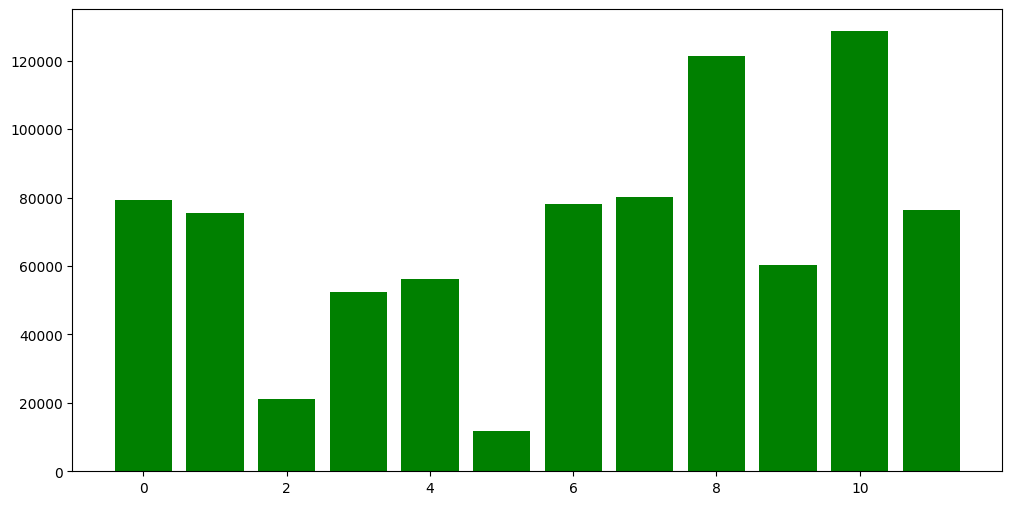

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.bar(df.index,
    df['Total Cash Inflow'],
    color='green');

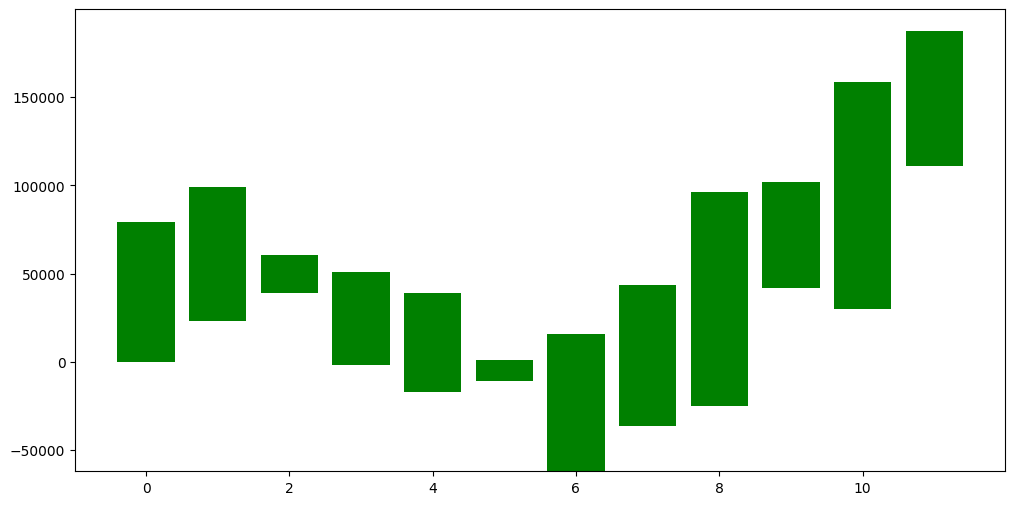

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.bar(df.index,
    df['Total Cash Inflow'],
    bottom=df['Beginning Cash Balance'],
    color='green');

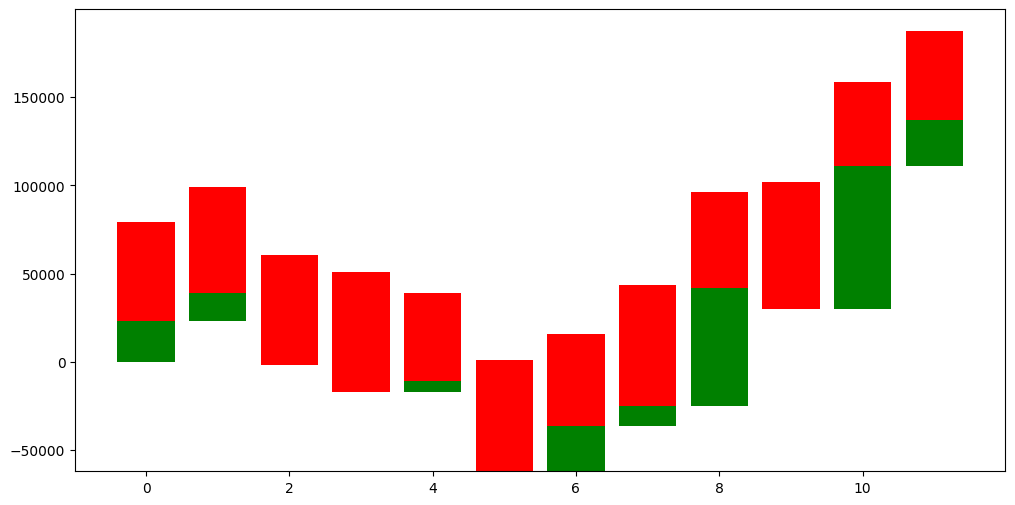

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.bar(df.index,
    df['Total Cash Inflow'],
    bottom=df['Beginning Cash Balance'],
    color='green')

ax.bar(df.index,
    df['Total Cash Outflow'],
    bottom=df['Ending Cash Balance'],
    color='red');

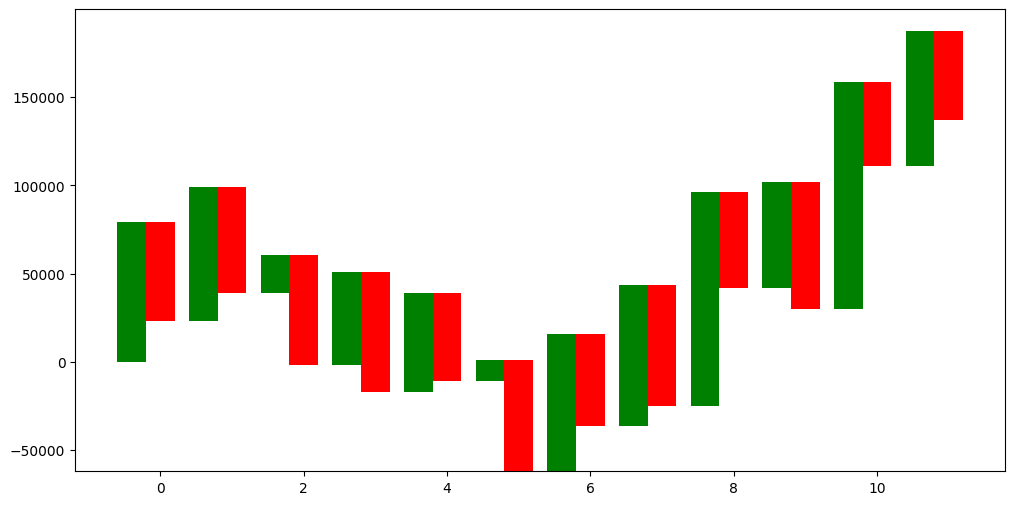

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

bar_width = 0.4

ax.bar(df.index - bar_width, 
       df['Total Cash Inflow'], 
       bottom=df['Beginning Cash Balance'],
       color='green',
       width=bar_width,
       label='Monthly Cash Inflow')

ax.bar(df.index,  
       df['Total Cash Outflow'], 
       bottom=df['Ending Cash Balance'],
       color='red',
       width=bar_width,
       label='Monthly Cash Outflow');

### Styling the plot

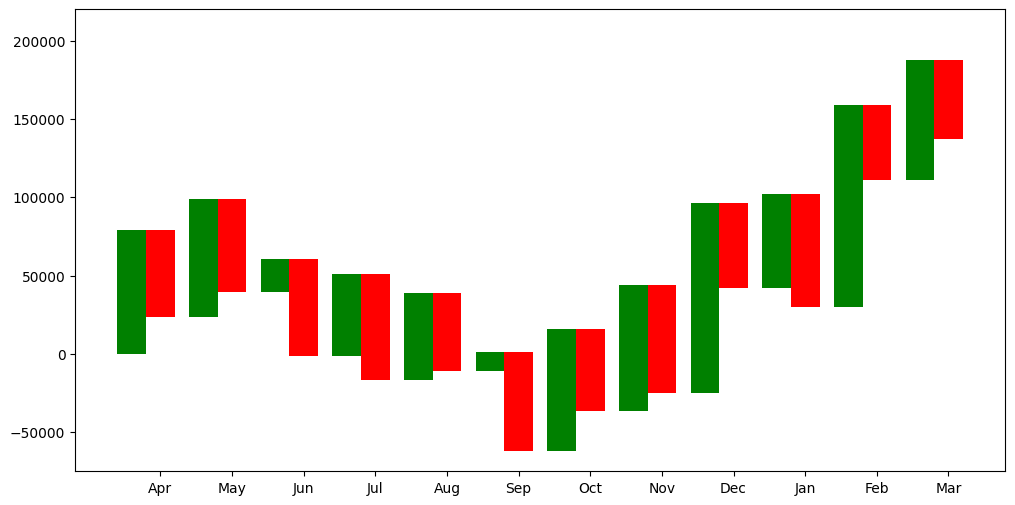

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

bar_width = 0.4

ax.bar(df.index - bar_width, 
       df['Total Cash Inflow'], 
       bottom=df['Beginning Cash Balance'],
       color='green',
       width=bar_width,
       label='Monthly Cash Inflow')

ax.bar(df.index,  
       df['Total Cash Outflow'], 
       bottom=df['Ending Cash Balance'],
       color='red',
       width=bar_width,
       label='Monthly Cash Outflow')

ax.set_ylim([-75000, 220000])

xticks = df.index
xticklabels = df['Month']

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels);

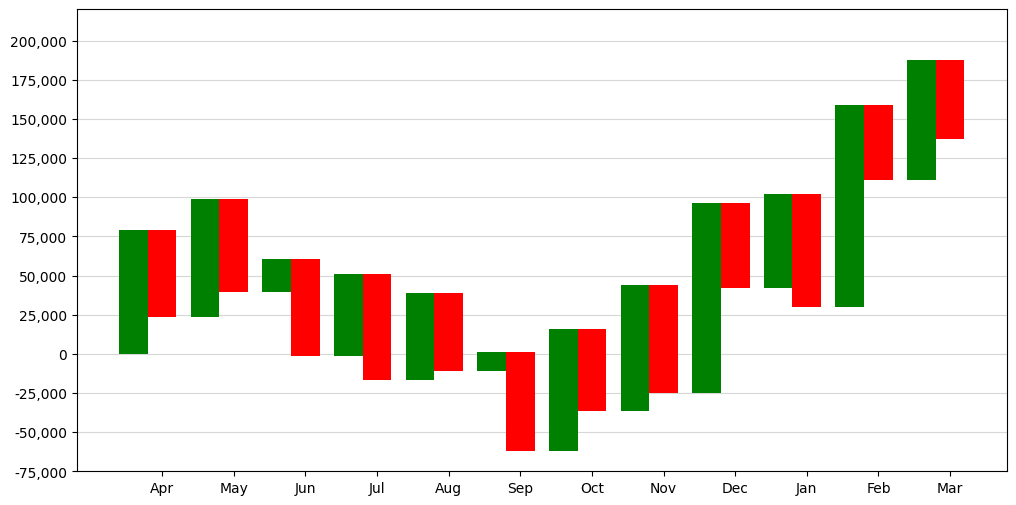

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

bar_width = 0.4

ax.bar(df.index - bar_width, 
       df['Total Cash Inflow'], 
       bottom=df['Beginning Cash Balance'],
       color='green',
       width=bar_width,
       label='Monthly Cash Inflow')

ax.bar(df.index,  
       df['Total Cash Outflow'], 
       bottom=df['Ending Cash Balance'],
       color='red',
       width=bar_width,
       label='Monthly Cash Outflow')

ax.set_ylim([-75000, 220000])

xticks = df.index
xticklabels = df['Month']

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

yticks = range(-75000, 225000, 25000)
yticklabels = [f'{ytick:,}' for ytick in yticks]

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

ax.grid(axis='y', alpha=0.5)
ax.set_axisbelow(True)

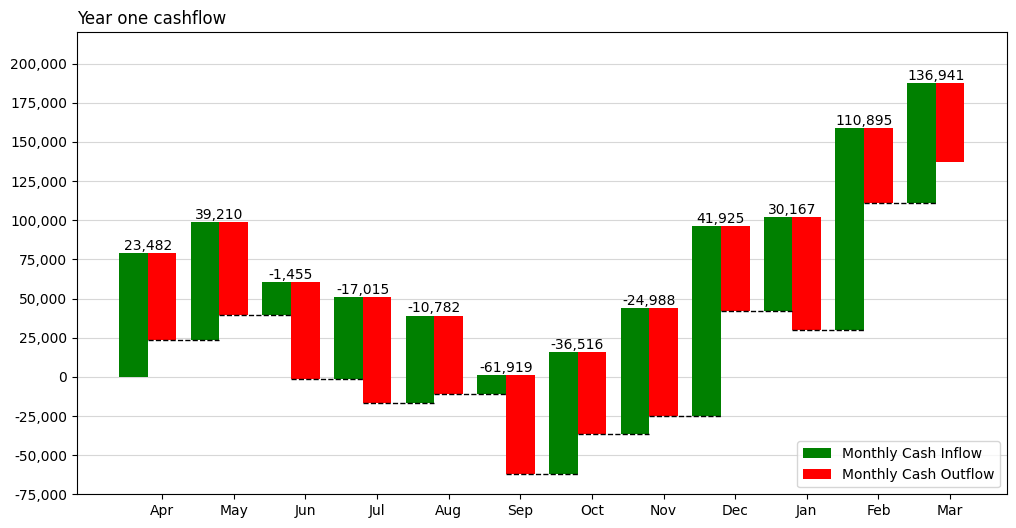

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

bar_width = 0.4

ax.bar(df.index - bar_width, 
       df['Total Cash Inflow'], 
       bottom=df['Beginning Cash Balance'],
       color='green',
       width=bar_width,
       label='Monthly Cash Inflow')

ax.bar(df.index,  
       df['Total Cash Outflow'], 
       bottom=df['Ending Cash Balance'],
       color='red',
       width=bar_width,
       label='Monthly Cash Outflow')

ax.set_ylim([-75000, 220000])

xticks = df.index
xticklabels = df['Month']

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

yticks = range(-75000, 225000, 25000)
yticklabels = [f'{ytick:,}' for ytick in yticks]

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

ax.grid(axis='y', alpha=0.5)
ax.set_axisbelow(True)

ax.set_title('Year one cashflow', loc='left');
ax.legend(loc='lower right');

for index, row in df.iterrows():    
    
    beginning_balance = row['Beginning Cash Balance']
    ending_balance = row['Ending Cash Balance']
    inflow = row['Total Cash Inflow']

    annotation_x = index - bar_width / 2
    annotation_y = beginning_balance + inflow + 2000
    
    ax.annotate(f"{ending_balance:,}", 
                xy=(annotation_x, annotation_y),
                horizontalalignment='center')
    
    if index < 11:
        ax.hlines(ending_balance, 
                  index - bar_width / 2, 
                  index + 2 * bar_width, 
                  color='black', linewidth=1, linestyle='dashed')

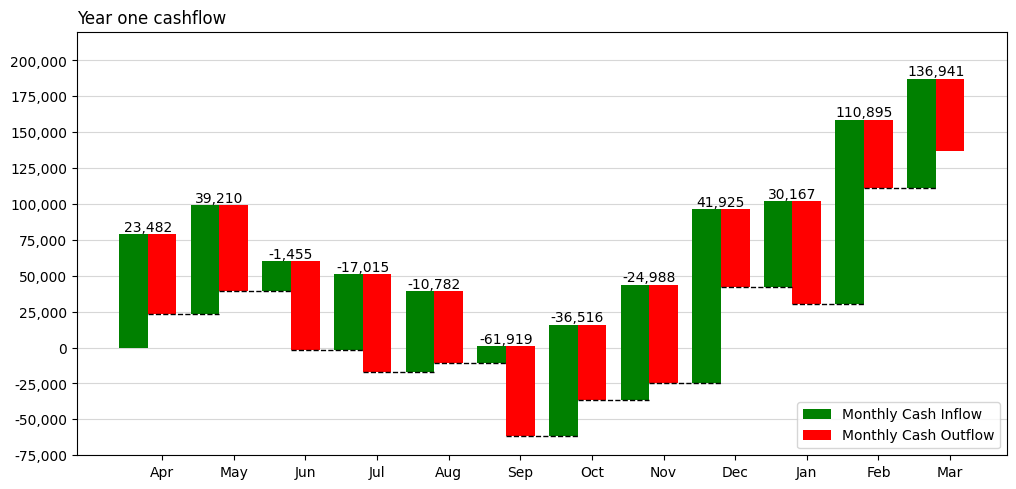

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5.5))  # Create the figure and axes

bar_width = 0.4  # Set the width of the bars for the bar chart

ax.bar(df.index - bar_width,                 # Plot the first set of bars (cash inflow)
       df['Total Cash Inflow'],              # Heights of the bars for cash inflow
       bottom=df['Beginning Cash Balance'],  # Start position for each bar (at the beginning cash balance)
       color='green',                        # Color for the cash inflow bars
       width=bar_width,                      # Set the width of the bars
       label='Monthly Cash Inflow')          # Label for the legend

ax.bar(df.index,  # Plot the second set of bars (cash outflow)
       df['Total Cash Outflow'],          # Heights of the bars for cash outflow
       bottom=df['Ending Cash Balance'],  # Start position for each bar (at the ending cash balance)
       color='red',                       # Color for the cash outflow bars
       width=bar_width,                   # Set the width of the bars
       label='Monthly Cash Outflow')      # Label for the legend

# Styling the plot
ax.set_ylim([-75000, 220000])  # Set the y-axis limits to include the full range of values

xticks = df.index                   # Use the DataFrame index for the x-ticks
xticklabels = df['Month'].unique()  # Extract unique months for x-tick labels

ax.set_xticks(xticks)            # Set the x-ticks to the DataFrame index
ax.set_xticklabels(xticklabels)  # Set the x-tick labels to the unique months

yticks = range(-75000, 225000, 25000)             # Create y-tick values in increments of 25,000
yticklabels = [f'{ytick:,}' for ytick in yticks]  # Format y-tick labels with commas for readability

ax.set_yticks(yticks)            # Set the y-ticks
ax.set_yticklabels(yticklabels)  # Set the formatted y-tick labels

ax.grid(axis='y', alpha=0.5)     # Add grid lines along the y-axis with a 50% transparency
ax.set_axisbelow(True)           # Make sure the grid lines are below the plot elements

ax.set_title('Year one cashflow', loc='left')  # Set the title of the plot and align it to the left
ax.legend(loc='lower right')                   # Place the legend in the lower-right corner of the plot

# Adding text annotation and lines
for index, row in df.iterrows():     # Iterate through each row in the DataFrame
    
    beginning_balance = row['Beginning Cash Balance']  # Get the beginning cash balance for the row
    ending_balance = row['Ending Cash Balance']        # Get the ending cash balance for the row
    inflow = row['Total Cash Inflow']                  # Get the cash inflow for the row
    
    # Annotate the ending balance above the corresponding bar in the plot
    ax.annotate(f"{ending_balance:,}", 
                xy=(index - bar_width / 2, beginning_balance + inflow + 2000),  # Position the annotation
                horizontalalignment='center')                                   # Center-align the text horizontally
    
    if index <= 10:  # Only add horizontal lines for the first 10 rows
        ax.hlines(ending_balance,                                  # Draw a horizontal line at the ending cash balance
                  index - bar_width / 2,                           # Starting position of the line (left of the bar)
                  index + 2 * bar_width,                           # Ending position of the line (right of the bar)
                  color='black', linewidth=1, linestyle='dashed')  # Style of the horizontal line